In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # car

Text(0,0.5,'magnitud')

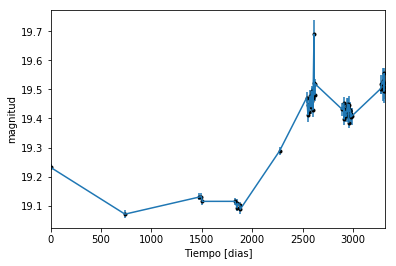

In [4]:
data = np.genfromtxt('LC_R_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

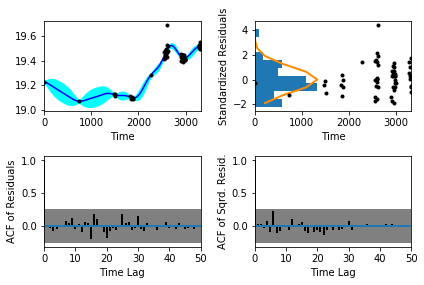

In [7]:
sample.assess_fit()

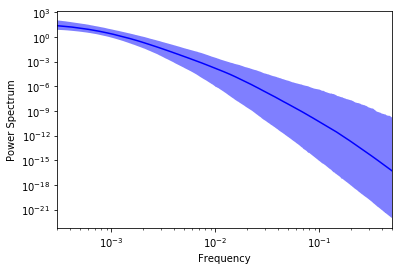

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0419665,'Nivel de ruido')

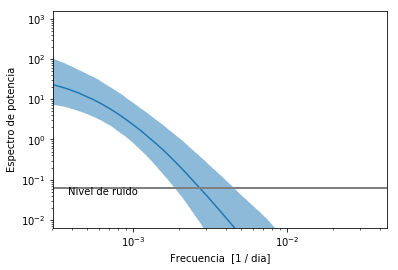

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [11]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [12]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [13]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 898.442970934
Median: 0.000926380317452
Standard deviation: 0.212547935867
68% credibility interval: [ 0.          0.24429651]
95% credibility interval: [ 0.          0.80794878]
99% credibility interval: [ 0.          0.94968578]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 898.442970934
Median: 0.000926380317452
Standard deviation: 0.212547935867
68% credibility interval: [ 0.          0.24429651]
95% credibility interval: [ 0.          0.80794878]
99% credibility interval: [ 0.          0.94968578]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1428.59089729
Median: 0.0
Standard deviation: 0.000348709133413
68

Plotting parameter summary


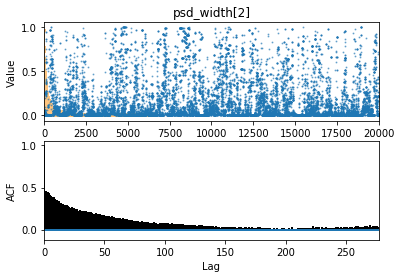

In [14]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [15]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1270.50069772
Median: 134.760442171
Standard deviation: 1.61075831789
68% credibility interval: [ 132.89004481  135.88439415]
95% credibility interval: [ 130.31537976  136.46693461]
99% credibility interval: [ 128.56953428  136.65663596]


In [17]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 705.317577438
Median: 1.24437857701
Standard deviation: 2.16657674345
68% credibility interval: [ 0.18159811  4.41828149]
95% credibility interval: [ 0.03597136  7.26484428]
99% credibility interval: [  0.02001493  10.33918701]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 470.98498159
Median: 0.531206649178
Standard deviation: 7.40823445087
68% credibility interval: [ 0.0416875   6.44284329]
95% credibility interval: [  3.44807872e-0

In [19]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1236.97442487
Median: 7.81389305788e-37
Standard deviation: 3.49578265191
68% credibility interval: [  2.24624713e-72   1.60435759e-17]
95% credibility interval: [  1.15787620e-135   1.56309370e-005]
99% credibility interval: [  2.76272956e-142   1.70333052e+000]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 662.048695287
Median: 1.68725524413e-21
Standard deviation: 2739.83433744
68% credibility interval: [  1.81177261e-41   1.084334

In [21]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2021.27378396
Median: 19.2746665126
Standard deviation: 0.113914233811
68% credibility interval: [ 19.18001836  19.37370787]
95% credibility interval: [ 19.04950197  19.51567137]
99% credibility interval: [ 18.91568173  19.63763189]


In [23]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 898.442970934
Median: 0.000926380317452
Standard deviation: 0.212547935867
68% credibility interval: [ 0.          0.24429651]
95% credibility interval: [ 0.          0.80794878]
99% credibility interval: [ 0.          0.94968578]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 898.442970934
Median: 0.000926380317452
Standard deviation: 0.212547935867
68% credibility interval: [ 0.          0.24429651]
95% credibility interval: [ 0.          0.80794878]
99% credibility interval: [ 0.          0.94968578]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1428.59089729
Median: 0.0
Standard deviation: 0.000348709133413
68

In [25]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1270.50069772
Median: 134.760442171
Standard deviation: 1.61075831789
68% credibility interval: [ 132.89004481  135.88439415]
95% credibility interval: [ 130.31537976  136.46693461]
99% credibility interval: [ 128.56953428  136.65663596]


In [27]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 5)

In [28]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 498.918354145
Median: 0.0100570244636
Standard deviation: 0.178548718595
68% credibility interval: [ 0.00101043  0.14557843]
95% credibility interval: [  3.71177366e-04   7.20897628e-01]
99% credibility interval: [  3.13045098e-04   9.27192078e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 770.890714417
Median: 0.00127840489652
Standard deviation: 0.0535587446291
68% credibility interval: [ 0.00041035  0.01473283]
95% credibility interval: [ 0.00031557  0.1519707 ]
99% credibility interval: [  3.03818004e-04   3.83574423e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 360.800661167
Median: 0.0305997100497
Standard 

In [29]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1864.17248148
Median: 0.0352825290817
Standard deviation: 0.0561337559718
68% credibility interval: [ 0.02009847  0.06865037]
95% credibility interval: [ 0.01264678  0.15446167]
99% credibility interval: [ 0.00955281  0.29999727]


In [32]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2069.6915703
Median: 1.17669059286
Standard deviation: 0.179218676235
68% credibility interval: [ 1.01537449  1.36434646]
95% credibility interval: [ 0.88309406  1.59356309]
99% credibility interval: [ 0.82198673  1.74927981]


In [34]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1080.4531948
Median: 2.54992356581e-06
Standard deviation: 0.00226981254129
68% credibility interval: [  7.32531081e-08   1.00938751e-04]
95% credibility interval: [  2.68788389e-09   2.05663985e-03]
99% credibility interval: [  3.08143132e-10   9.63065774e-03]


In [36]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 5)

In [37]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 498.918354145
Median: (-0.0631901483439-0.535569523026j)
Standard deviation: 1.74415010944
68% credibility interval: [-0.91469623-4.60538965j -0.00634871-0.27199583j]
95% credibility interval: [ -4.52953339e+00+0.j          -2.33217617e-03-0.39609295j]
99% credibility interval: [ -5.82571964e+00+0.j        -1.96692036e-03-0.001169j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 770.890714417
Median: (-0.00803245486243+1.38883743723j)
Standard deviation: 1.37722440251
68% credibility interval: [-0.09256910+0.j -0.00257831+0.j]
95% credibility interval: [-0.95486010+2.26487815j -0.00198281+0.59613542j]
99% credibility interval: [ -2.41006918e+00+3.55651316j  -1.90894482e-03+0.j        ]
Posterior summary for parameter 

Plotting 2d PDF w KDE


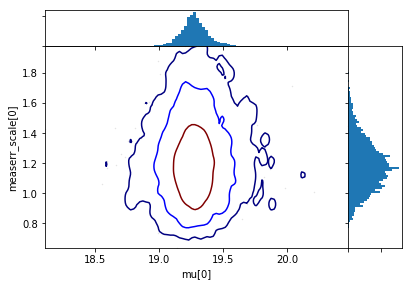

In [38]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


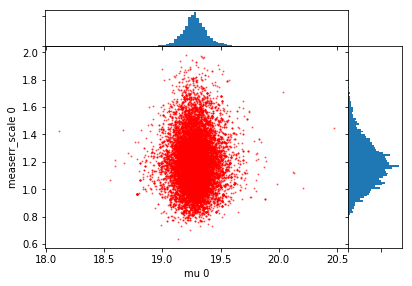

In [39]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


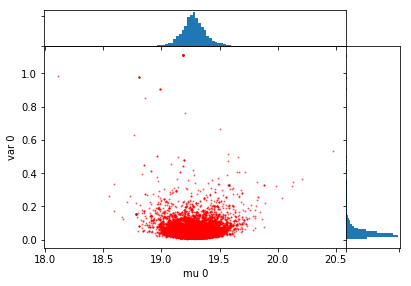

In [40]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


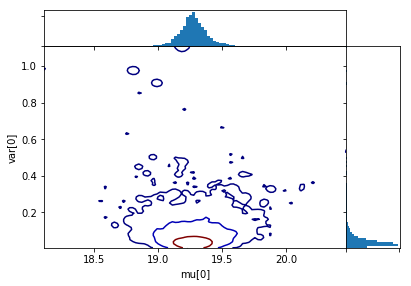

In [41]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

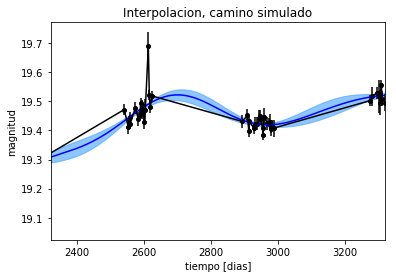

In [42]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

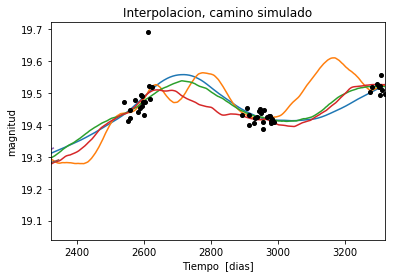

In [43]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')